In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
folder='desktop/crem'
os.listdir(folder)

['Marché solaire 2016.pdf',
 'CR-06.04.docx',
 'canton_communes_EPT',
 '.DS_Store',
 'communes:cantons.xlsx',
 'Subventions PR par canton et par an.xlsx',
 'IDC_canton_geneve_2010.xlsx',
 "L'efficacité énergétique dans le ménage.pdf",
 'indice_moyen.csv',
 'logo_CREM.png',
 'Textes législatifs',
 '~$TILS INFORMATIQUES.docx',
 'LEne - Canton de VAUD.docx',
 'assurance_suisse_2.tif',
 'Étude canton:commune.xlsx',
 'assurance_suisse_1.tif',
 'Documents',
 'cheat-python.pdf',
 'Cours_analyse_de_corrélation.pdf',
 'Data',
 'Raw Data']

In [3]:
df=pd.read_excel(os.path.join(folder,'communes:cantons.xlsx'))
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,Canton,EPT Canton,EPT communes,Région
0,Zurich,17.33,10.77,ALL
1,Berne,25.24,12.38,ALL
2,Lucerne,25.68,14.51,ALL
3,Uri,23.46,36.61,ALL
4,Schwytz,7.60,8.56,ALL
5,Obwald,11.98,41.38,ALL
6,Nidwald,11.95,22.66,ALL
7,Glaris,11.54,3.40,ALL
8,Zoug,17.96,22.85,ALL
9,Fribourg,33.87,13.90,ROM


In [4]:
df['Part employés communaux']=df['EPT communes']/(df['EPT Canton']+df['EPT communes'])
df.to_csv(os.path.join('Desktop','canton_communes_EPT'))

In [5]:
df.sort_values('Part employés communaux',inplace=True)
df.reset_index(inplace=True)

<IPython.core.display.Javascript object>


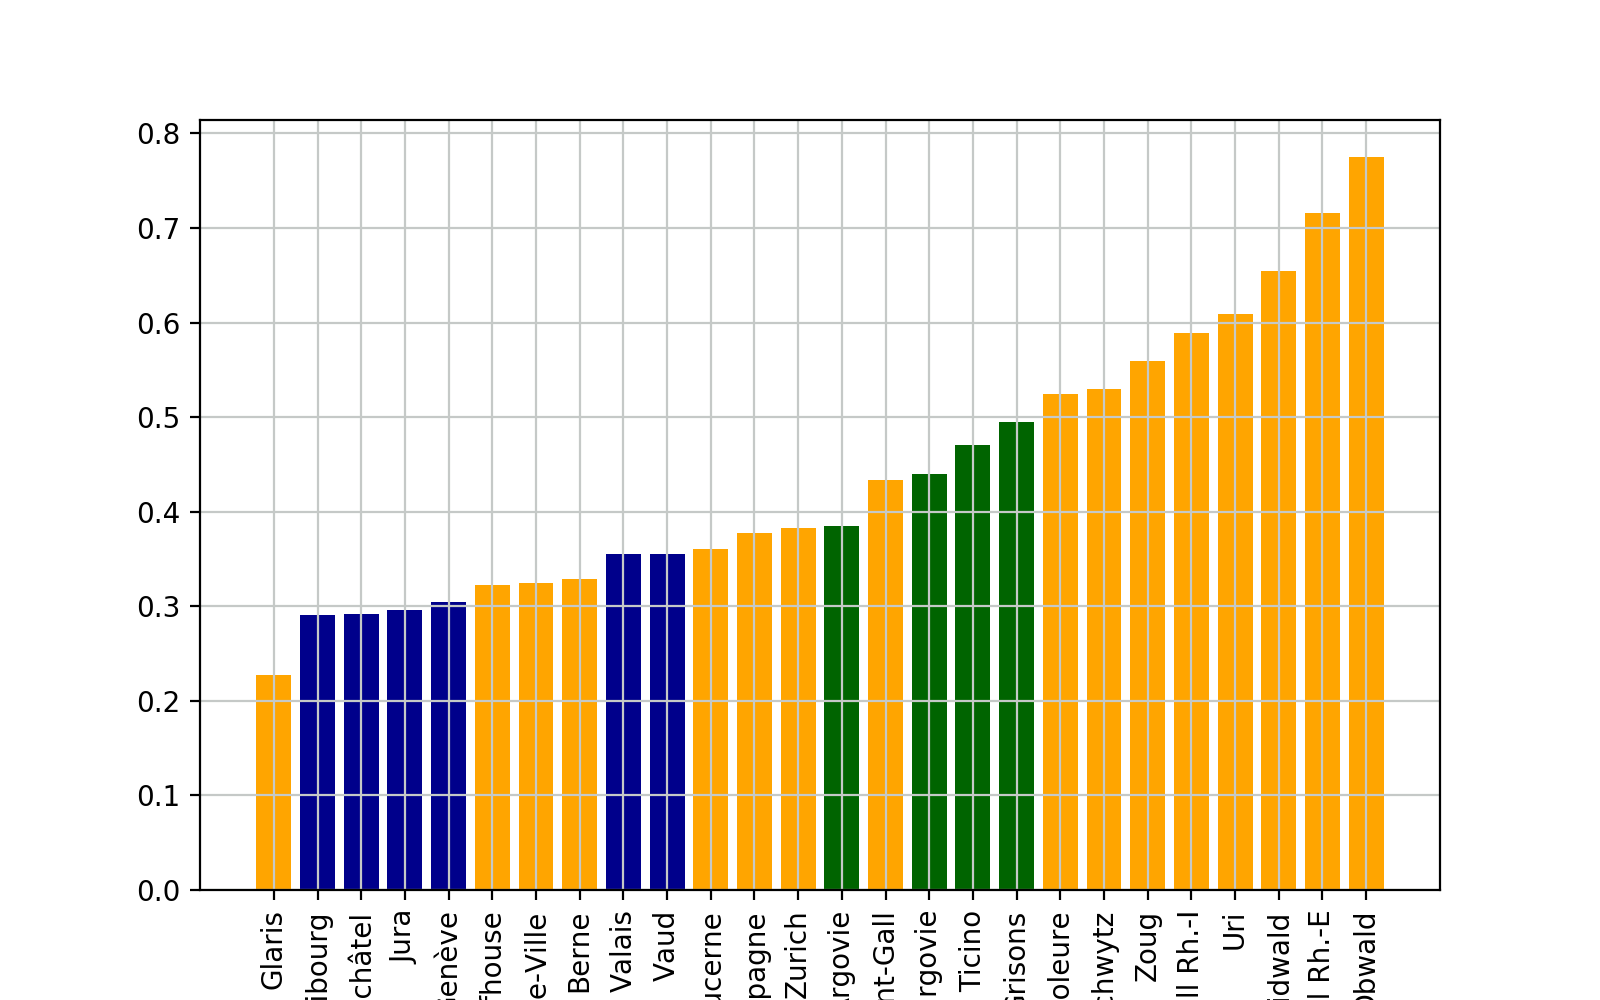

([<matplotlib.axis.XTick at 0x111b1c9e8>,
 <a list of 26 Text xticklabel objects>)

In [6]:
%matplotlib notebook
x1=df[df['Région']=='ROM'].index
y1=df[df['Région']=='ROM']['Part employés communaux']
x2=df[df['Région']=='ALL'].index
y2=df[df['Région']=='ALL']['Part employés communaux']
x3=df[df['Région']=='IT'].index
y3=df[df['Région']=='IT']['Part employés communaux']
plt.figure('Répartition des employés communaux',figsize=(8,5))
plt.bar(x1, y1, color='darkblue')
plt.bar(x2,y2,color='orange')
plt.bar(x3,y3,color='darkgreen')
plt.grid(color='xkcd:silver')
ticks=df['Canton']
plt.xticks(df.index, ticks, rotation=90)

In [7]:
df.groupby('Région')['Part employés communaux'].mean()

Région
ALL    0.482389
IT     0.447405
ROM    0.315656
Name: Part employés communaux, dtype: float64